# Analysis of dna dataset

In [1]:
library(entropy)
source("lda.R")

### How close is distribution of classes between the training and testing datasets?

In [45]:
library(dplyr)
for (i in 0:19) {
 dfs <- read_wlws(800, "waveform", i)
 v1 <- table(dfs$train|> dplyr::filter(class_id %in% c(2,4,7)))
 v2 <- table(dfs$test|> dplyr::filter(class_id %in% c(2,4,7) ))
 v <- as.matrix(v1/sum(v1) - v2/sum(v2) )
 print(norm(v, "F"))
 print(KL.plugin(v1, v2))
}

[1] "unzips/n800/waveform.scale-0"


ERROR: Error in UseMethod("filter"): no applicable method for 'filter' applied to an object of class "c('integer', 'numeric')"


In [2]:
dfs <- read_wlws(800, "segment", 7)

[1] "unzips/n800/segment.scale-7"


In [3]:
lda_multi(dfs)$multi

[1]   1   2 Inf


Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”


[1]   2   5 Inf
[1]   2   6 Inf
[1]   5   6 Inf
[1]   2   7 Inf


Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”


[1]   6   7 Inf


Warning message in fn(r[, , k]):
“stratified() : Maximum number of iterations reached without convergence 
 delta =1.02822e-39
 delta1= 1.02768e-39”


n,K,method,correct,dataset,run
<dbl>,<int>,<chr>,<int>,<chr>,<dbl>
800,7,normal,561,segment,7
800,7,radial,933,segment,7
800,7,wlw2,936,segment,7
800,7,oracle,932,segment,7


In [4]:
t1 <- lda_triples(dfs)
t2 <- t1 |> pivot_wider(names_from = "method", values_from = "acc") |> 
  mutate(imp = wlw2 - pmax(omit12, omit13, omit23)) |> arrange(desc(imp)) 
t2 |> print(n =7)

[1]   1   2 Inf


Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”


[1]   2   5 Inf
[1]   2   6 Inf
[1]   5   6 Inf
[1]   2   7 Inf


Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”


[1]   6   7 Inf
[1] 7
# A tibble: 35 × 10
      i     j     k normal radial  wlw2 omit12 omit13 omit23    imp
  <int> <int> <int>  <dbl>  <dbl> <dbl>  <dbl>  <dbl>  <dbl>  <dbl>
1     2     4     7  0.775  0.995 0.995  0.850  0.674  0.836 0.146 
2     2     6     7  0.876  0.995 0.995  0.809  0.911  0.937 0.0583
3     1     3     4  0.940  0.968 0.968  0.826  0.800  0.915 0.0528
4     1     2     4  0.745  0.995 0.995  0.893  0.718  0.977 0.0182
5     2     4     5  0.810  0.951 0.951  0.937  0.878  0.782 0.0141
6     1     4     5  0.865  0.947 0.944  0.930  0.840  0.867 0.0140
7     2     5     6  0.766  0.991 0.991  0.953  0.979  0.702 0.0118
# ℹ 28 more rows


In [6]:
W <- gen_W(qL = 3, n = 1000)

In [11]:
bcp <- get_bcp(dfs = dfs, i = 2, j = 4, k = 7)

Warning message in lda.default(x, grouping, ...):
“variables are collinear”


[1]   2   7 Inf


Warning message in lda.default(x, grouping, ...):
“variables are collinear”


### Crossvalidation of best ensemble (1,2,3)

In [12]:
r1 <- cv_stack(bcp = select_bcp(bcp, 1:3), W = W, score = "acc")
r1 |> group_by(rep) |> summarize(m = sum(correct2)) |> summarize(mean(m))

[1]  432 1000


mean(m)
<dbl>
378.25


In [13]:
r2 <- cv_stack(bcp = select_bcp(bcp, 1:3), W = W, score = "brier")
r2 |> group_by(rep) |> summarize(m = sum(correct2)) |> summarize(mean(m))

[1]  432 1000


mean(m)
<dbl>
344.55


In [14]:
r3 <- cv_stack(bcp = select_bcp(bcp, 1:3), W = W, score = "log")
r3 |> group_by(rep) |> summarize(m = sum(correct2)) |> summarize(mean(m))

[1]  432 1000


mean(m)
<dbl>
346.5


In [15]:
r1 |> group_by(best_w) |> summarize(m = n())  |> arrange(desc(m))

best_w,m
<int>,<int>
269,4
299,4
669,4
729,4
425,3
519,3
526,3
540,3
699,3


In [16]:
ac <- apply(eval_scores(select_bcp(bcp, 1:3), W = W, score = "acc")$scores, 2, mean)

In [17]:
max(ac)

[1] 0.8773148

In [18]:
ac[c(810, 902, 897, 625, 373, 72, 123)]

[1] 0.8750000 0.8518519 0.8750000 0.7754630 0.7754630 0.7777778 0.7754630

In [19]:
which.max(ac)

[1] 17

In [20]:
W[810,]

[1] 0.06 0.49 0.45

In [21]:
r3 |> group_by(best_w) |> summarize(m = n())  |> arrange(desc(m))

best_w,m
<int>,<int>
538,14
656,14
1,6
2,3
599,2
3,1
4,1
8,1
12,1


In [22]:
ac[c(112,960,585, 353,58,7,8)]

[1] 0.8773148 0.7777778 0.6736111 0.8773148 0.7754630 0.7754630 0.8750000

### Crossvalidation of best ensemble (1,2,4)

In [23]:
r4 <- cv_stack(bcp = select_bcp(bcp, c(1,2,4)), W = W, score = "acc")
r4 |> group_by(rep) |> summarize(m = sum(correct2)) |> summarize(mean(m))

[1]  432 1000


mean(m)
<dbl>
372.4


### Crossvalidation of best ensemble (1,3,4)

In [24]:
r5 <- cv_stack(bcp = select_bcp(bcp, c(1,3,4)), W = W, score = "acc")
r5 |> group_by(rep) |> summarize(m = sum(correct2)) |> summarize(mean(m))

[1]  432 1000


mean(m)
<dbl>
387


In [25]:
r6 <- cv_stack(bcp = select_bcp(bcp, c(1,3,4)), W = W, score = "acc")
r6 |> group_by(rep) |> summarize(m = sum(correct2)) |> summarize(mean(m))

[1]  432 1000


mean(m)
<dbl>
387.1


### Crossvalidation of best ensemble (2,3,4)

In [26]:
r7 <- cv_stack(bcp = select_bcp(bcp, c(2,3,4)), W = W, score = "acc")
r7 |> group_by(rep) |> summarize(m = sum(correct2)) |> summarize(mean(m))

[1]  432 1000


mean(m)
<dbl>
430


### Crossvalidation of best ensemble (1,2)

In [27]:
W1 <- matrix(seq(0,1, length.out = 51), ncol = 2, nrow = 51, byrow=F)
W1[,2] = 1 - W1[,1]

In [28]:
r8 <- cv_stack(bcp = select_bcp(bcp, 1:2), W = W1, score = "acc")

[1] 432  51


In [29]:
r8 |> group_by(best_w) |> summarize(m=n()) |> arrange(desc(m)) |> print(n = 5)

# A tibble: 26 × 2
  best_w     m
   <int> <int>
1      6     8
2     26     8
3      5     7
4     20     7
5      9     5
# ℹ 21 more rows


In [30]:
r9 <- cv_stack(bcp = select_bcp(bcp, 1:2), W = W1, score = "brier")
r9 |> group_by(best_w) |> summarize(m=n()) |> arrange(desc(m)) |> print(n = 5)

[1] 432  51
# A tibble: 14 × 2
  best_w     m
   <int> <int>
1      5    14
2      1    10
3      2    10
4      4    10
5      9     8
# ℹ 9 more rows


In [31]:
r10 <- cv_stack(bcp = select_bcp(bcp, 1:2), W = W1, score = "log")
r10 |> group_by(best_w) |> summarize(m=n()) |> arrange(desc(m)) |> print(n = 5)

[1] 432  51
# A tibble: 30 × 2
  best_w     m
   <int> <int>
1      1     6
2      7     6
3     28     6
4      2     5
5     12     5
# ℹ 25 more rows


In [32]:
ac1 <- apply(eval_scores(select_bcp(bcp, 1:2), W = W1, score = "acc")$scores, 2, mean)

In [33]:
which.max(ac1)
max(ac1)
min(ac1)
which.min(ac1)
W1[1,]

[1] 26

[1] 0.8634259

[1] 0.775463

[1] 30

[1] 0 1

In [34]:
ac1[c(13,46,19,27,33)]

[1] 0.8495370 0.7754630 0.8518519 0.7777778 0.7754630

In [35]:
W1[c(22,24,31),]

0.42,0.58
0.46,0.54
0.60,0.40


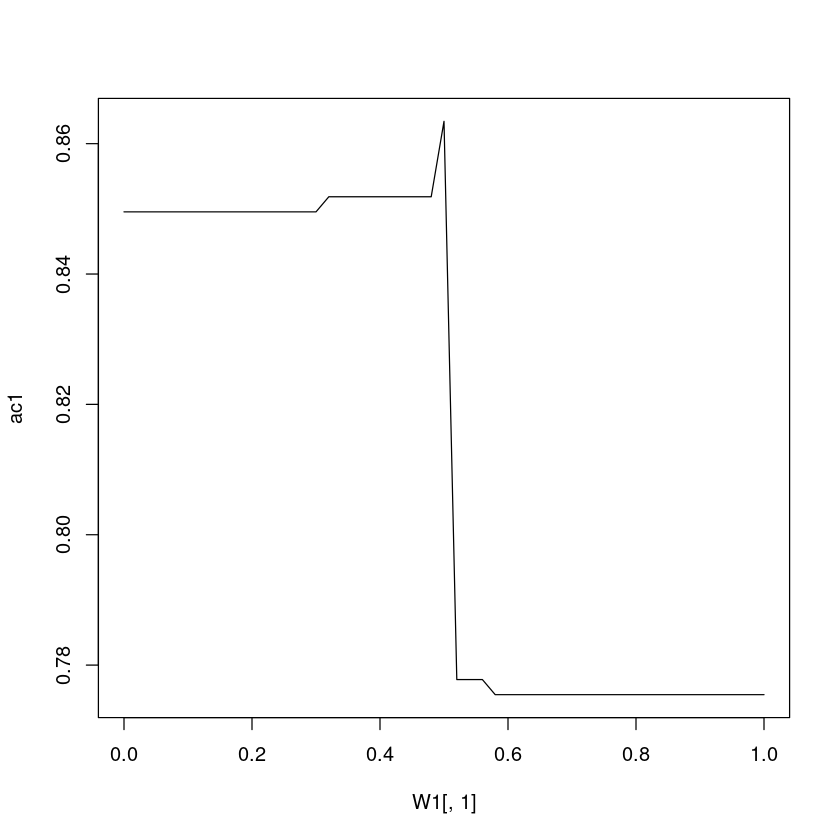

In [36]:
plot(W1[,1], ac1, type = "l")

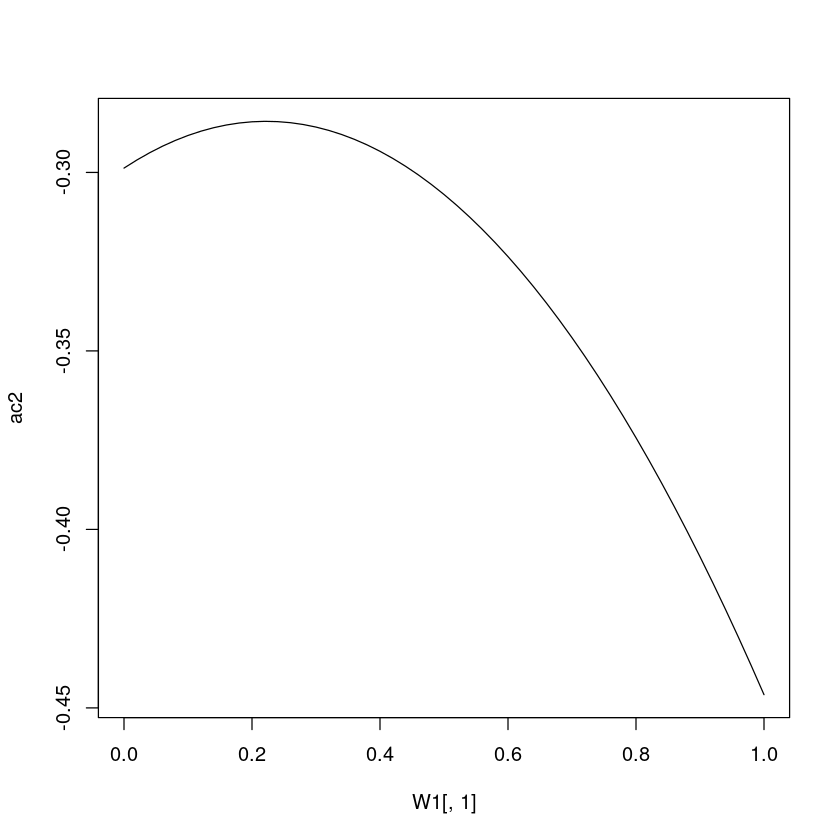

In [37]:
ac2 <- apply(eval_scores(select_bcp(bcp, 1:2), W = W1, score = "brier")$scores, 2, mean)
plot(W1[,1], ac2, type = "l")

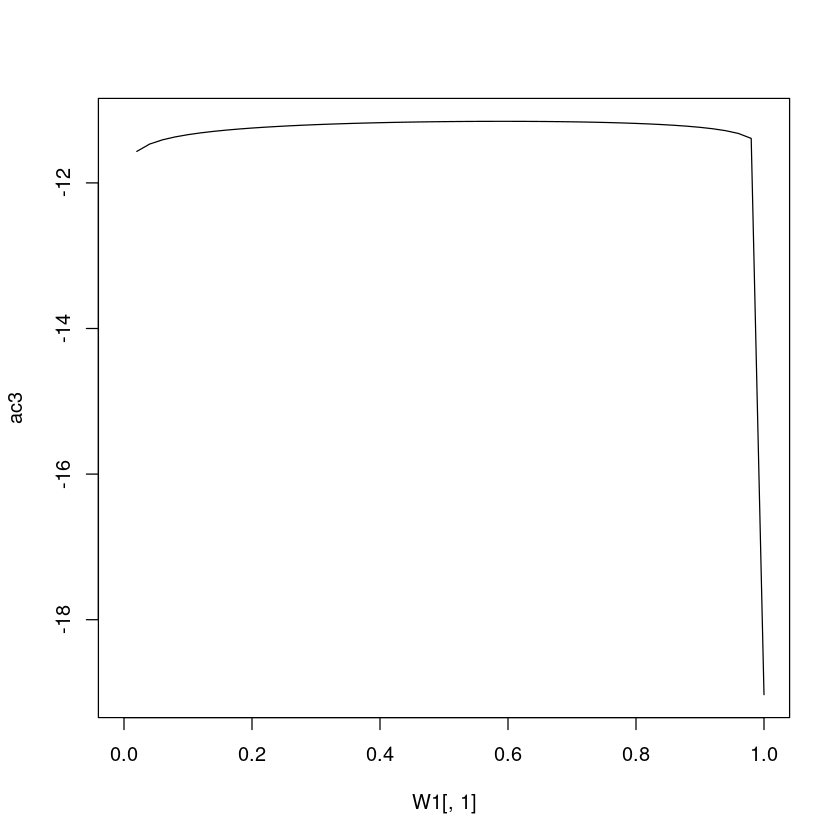

In [39]:
ac3 <- apply(eval_scores(select_bcp(bcp, 1:2), W = W1, score = "log")$scores, 2, mean)
plot(W1[,1], ac3, type = "l")

In [40]:
r8 |> group_by(rep) |> summarize(m = sum(correct2)) |> summarize(mean(m))

mean(m)
<dbl>
367.65


In [41]:
r9 |> group_by(rep) |> summarize(m = sum(correct2)) |> summarize(mean(m))

mean(m)
<dbl>
367


In [42]:
r10 |> group_by(rep) |> summarize(m = sum(correct2)) |> summarize(mean(m))

mean(m)
<dbl>
360.5


## Full ensemble

In [47]:
W2 <- gen_W(qL = 4, n = 4000)
r11 <- cv_stack(bcp = select_bcp(bcp, 1:4), W = W2, score = "acc")

[1]  432 4000


In [48]:
r11 |> group_by(rep) |> summarize(m = sum(correct2)) |> summarize(mean(m))

mean(m)
<dbl>
430


In [52]:
ac7 <- apply(eval_scores(select_bcp(bcp, 1:4), W = W2, score = "acc")$scores, 2, mean)
max(ac7)

[1] 0.9953704

In [53]:
which.max(ac7)

[1] 2

In [54]:
W2[2,]

[1] 0.39 0.09 0.46 0.06